In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log = pd.read_csv('train_events.csv')
data = pd.read_parquet('train_series.parquet')
data.head(15)

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215
5,038441c925bb,5,2018-08-14T15:30:25-0400,2.6367,0.0217
6,038441c925bb,6,2018-08-14T15:30:30-0400,2.6367,0.0217
7,038441c925bb,7,2018-08-14T15:30:35-0400,2.6367,0.0218
8,038441c925bb,8,2018-08-14T15:30:40-0400,2.7980,0.0223
9,038441c925bb,9,2018-08-14T15:30:45-0400,3.0847,0.0217


# Exploratory Data Analysis

In [23]:
# first I would like to know how many unique values for the series_id there are, to understand the size of the available 
# data better, the number between the number between both sets should be consistent
unique_series_ids_data = data['series_id'].nunique()
unique_series_ids_log = log['series_id'].nunique()


print("Number of unique series IDs in data:", unique_series_ids)
print("Number of unique series IDs in log:", unique_series_ids_log)

Number of unique series IDs in data: 277
Number of unique series IDs in log: 277


In [24]:
# First I want to gain an understanding of the data, by analyzing a single series, for which I take the first one

desired_series_id = '038441c925bb'

# Create a boolean mask to filter the rows
mask = data['series_id'] == desired_series_id

mask2 = log['series_id'] == desired_series_id

# Use the mask to select the desired rows and create a new DataFrame
series1_data = data[mask]

series1_log = log[mask2]


print(series1_data.head())
print(series1_log.head())

      series_id  step                 timestamp  anglez    enmo
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215
      series_id  night   event     step                 timestamp
0  038441c925bb      1   onset   4992.0  2018-08-14T22:26:00-0400
1  038441c925bb      1  wakeup  10932.0  2018-08-15T06:41:00-0400
2  038441c925bb      2   onset  20244.0  2018-08-15T19:37:00-0400
3  038441c925bb      2  wakeup  27492.0  2018-08-16T05:41:00-0400
4  038441c925bb      3   onset  39996.0  2018-08-16T23:03:00-0400


In [7]:
data.describe()

,step,anglez,enmo
count,1.279463e+08,1.279463e+08,1.279463e+08
mean,2.548048e+05,-8.810453e+00,4.131503e-02
std,1.778930e+05,3.015709e+01,9.743801e-02
min,0.000000e+00,-9.000000e+01,0.000000e+00
25%,1.158120e+05,-3.185890e+01,1.300000e-03
50%,2.345190e+05,-9.597900e+00,1.720000e-02
75%,3.571960e+05,1.130020e+01,4.370000e-02
max,1.433879e+06,9.000000e+01,1.143370e+01


In [25]:
print(series1_data.head())
print(series1_log.head(100))

      series_id  step                 timestamp  anglez    enmo
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215
       series_id  night   event      step                 timestamp
0   038441c925bb      1   onset    4992.0  2018-08-14T22:26:00-0400
1   038441c925bb      1  wakeup   10932.0  2018-08-15T06:41:00-0400
2   038441c925bb      2   onset   20244.0  2018-08-15T19:37:00-0400
3   038441c925bb      2  wakeup   27492.0  2018-08-16T05:41:00-0400
4   038441c925bb      3   onset   39996.0  2018-08-16T23:03:00-0400
5   038441c925bb      3  wakeup   44400.0  2018-08-17T05:10:00-0400
6   038441c925bb      4   onset   57240.0  2018-08-17T23:00:00-0400
7   038441c925bb      4  wakeup   62856.0  2018-08-18T06:48:00-0400
8   

In [26]:
# next I would like to compare if I visually see a connection between the anglez variable vs time step and the onset or wakeup
# in the given series, I conver onset to 0 and wakeup to 1

# Create a dictionary to define the replacement mapping

print(series1data.columns)
replacement_dict = {"onset": 0, "wakeup": 1}
series1_log['event'] = series1_log['event'].replace(replacement_dict)

Index(['series_id', 'step', 'timestamp', 'anglez', 'enmo'], dtype='object')


C:\Users\Hauke\AppData\Local\Temp\ipykernel_1360\363080361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series1_log['event'] = series1_log['event'].replace(replacement_dict)


In [27]:
series1_log.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,0,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,1,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,0,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,1,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,0,39996.0,2018-08-16T23:03:00-0400


389880


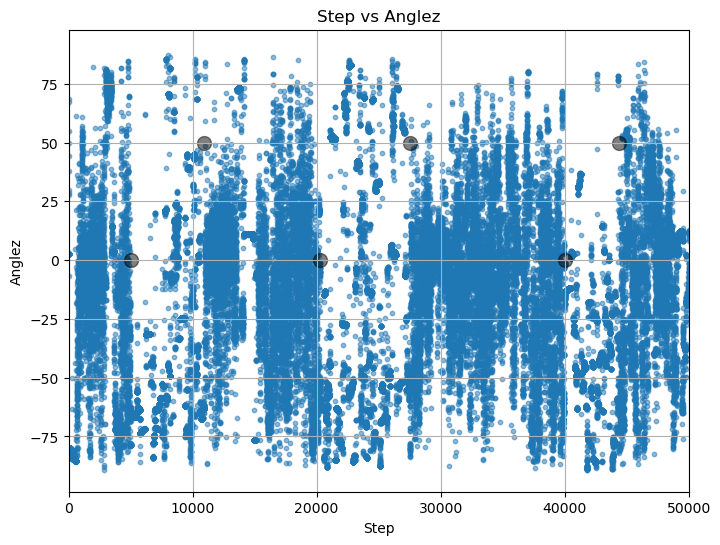

In [28]:
print(series1data.shape[0])
step_column = series1_data['step']
anglez_column = series1_data['anglez']

step_column_log = series1_log['step']
event_column_log = 50*series1_log['event']

# Create a basic scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(step_column, anglez_column, marker='o', s=10, alpha=0.5)  # Customize the marker and style
plt.scatter(step_column_log, event_column_log, marker='o', s=100, alpha=0.5, color='black')

plt.xlim(0, 50000) # I zoom in to visually see correlations better, in principle this plot extends to 
# much much further

# Add labels and a title
plt.xlabel('Step')
plt.ylabel('Anglez')
plt.title('Step vs Anglez')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# One can visually see from the above picture that during the onset and wakeup there is a reduced anglez measurment. 
# This basically means that his variable is reduced during periods of sleep. 